# Digit Recognizer | Convolutional Neural Network

## Necessesary Libraries Importing

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Loading Dataset

In [5]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (42000, 785)
Test Shape :  (28000, 784)


## Overview to Dataset

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Splitting

In [8]:
y_train = train["label"]
x_train = train.drop(labels = ["label"], axis = 1)

## Number of Digit Classes

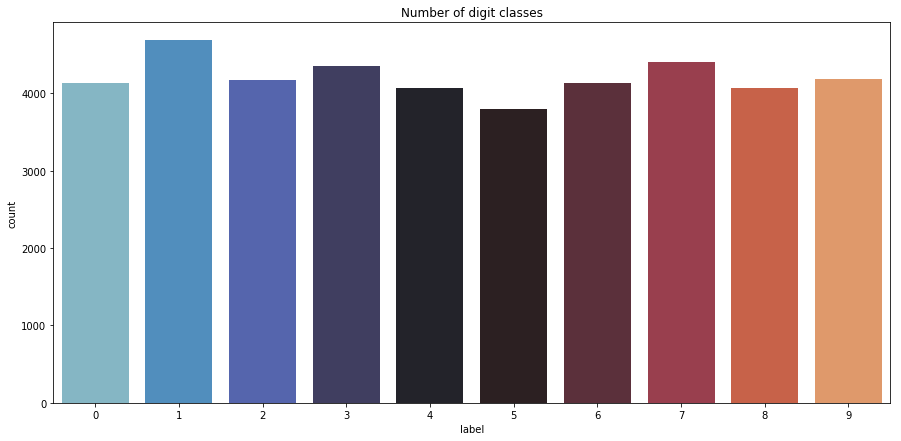

In [9]:
plt.figure(figsize = (15,7))
g = sns.countplot(y_train, palette = "icefire")
plt.title("Number of digit classes");

## Overview to Some Images

y_train[50] value is  7


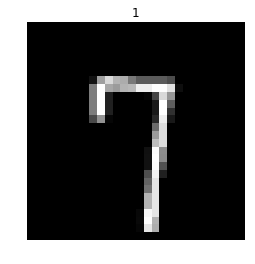

In [10]:
print("y_train[50] value is ",y_train[50])
img = x_train.iloc[50].as_matrix()
img = img.reshape((28,28))
plt.imshow(img, cmap = "gray")
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

y_train[70] value is  3


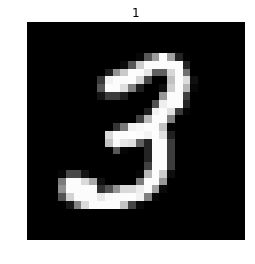

In [11]:
print("y_train[70] value is ",y_train[70])
img = x_train.iloc[70].as_matrix()
img = img.reshape((28,28))
plt.imshow(img, cmap = "gray")
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

## Normalization

In [12]:
x_train = x_train/255.0
test = test / 255.0
print("x_train shape : ", x_train.shape)
print("test shape : ",test.shape)

x_train shape :  (42000, 784)
test shape :  (28000, 784)


## Reshape Operation

In [13]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("x train shape : ", x_train.shape)
print("test shape : ",test.shape)

x train shape :  (42000, 28, 28, 1)
test shape :  (28000, 28, 28, 1)


## One Hot Encoding

In [14]:
y_train = to_categorical(y_train, num_classes = 10)

In [16]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Final Splitting

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

print("x_train shape :", x_train.shape)
print("x_test shape :",x_val.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :",y_val.shape)

x_train shape : (37800, 28, 28, 1)
x_test shape : (4200, 28, 28, 1)
y_train shape : (37800, 10)
y_test shape : (4200, 10)


## Implementing with Keras

conv -> maxpool -> dropout -> conv -> maxpool -> dropout -> fully connected (2layer)

## Model Building

In [19]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Compiling Model

In [80]:
optimizer = Adam(lr=0.001, beta_1 = 0.9, beta_2 = 0.999)

In [81]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [88]:
epochs = 10
batch_size = 250

## Data Augmentation

In [89]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 0.5,
                            zoom_range = 0.5,
                            width_shift_range = 0.5,
                            height_shift_range = 0.5,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(x_train)

## Model Fitting

In [90]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                             epochs = epochs,
                             validation_data = (x_val, y_val),
                             steps_per_epoch = x_train.shape[0] //batch_size)

Epoch 1/10
151/151 [==============================] - 39s 257ms/step - loss: 1.6065 - acc: 0.4434 - val_loss: 0.6652 - val_acc: 0.8457
Epoch 2/10
151/151 [==============================] - 40s 268ms/step - loss: 1.5396 - acc: 0.4690 - val_loss: 0.5354 - val_acc: 0.8769
Epoch 3/10
151/151 [==============================] - 38s 252ms/step - loss: 1.4782 - acc: 0.4887 - val_loss: 0.4230 - val_acc: 0.9074
Epoch 4/10
151/151 [==============================] - 42s 277ms/step - loss: 1.4365 - acc: 0.5044 - val_loss: 0.3725 - val_acc: 0.9167
Epoch 5/10
151/151 [==============================] - 37s 247ms/step - loss: 1.3915 - acc: 0.5219 - val_loss: 0.3282 - val_acc: 0.9264
Epoch 6/10
151/151 [==============================] - 36s 237ms/step - loss: 1.3597 - acc: 0.5332 - val_loss: 0.3134 - val_acc: 0.9198
Epoch 7/10
151/151 [==============================] - 37s 246ms/step - loss: 1.3225 - acc: 0.5491 - val_loss: 0.2671 - val_acc: 0.9324
Epoch 8/10
151/151 [==============================] - 3

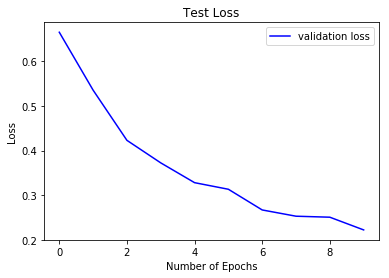

In [91]:
plt.plot(history.history["val_loss"], color = "b", label = "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

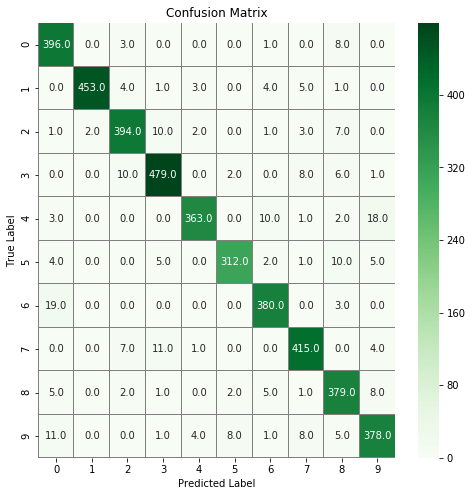

In [92]:
import seaborn as sns
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".1f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()